In [255]:
import pandas as pd
import numpy as np

In [256]:
from sklearn.datasets import make_classification

In [342]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

In [343]:
X.shape

(100, 2)

In [344]:
import matplotlib.pyplot as plt

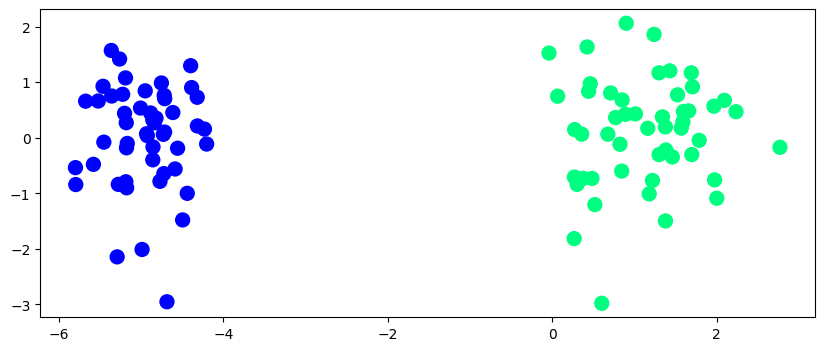

In [346]:
plt.figure(figsize=(10,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [347]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    print(X.shape) # 100,3
    weights = np.ones(X.shape[1]) # 3,1
    print(weights.shape)
    lr = 0.01
    for i in range(2000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [348]:
def perceptron1(X,y):
    X = np.insert(X,0,1,axis=1)
    print(X.shape) # 100,3
    weights = np.ones(X.shape[1]) # 3,1
    print(weights.shape)
    lr = 0.01
    for i in range(2000):
        j = np.random.randint(0,100)
        y_hat = step1(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [349]:
def step1(z):
    return 1 if z > 0 else 0

def step(z):
    return 1/(1+np.exp(-z))

In [350]:
intercept_1,coef_1 = perceptron1(X,y)

(100, 3)
(3,)


In [351]:
intercept_2,coef_2 = perceptron(X,y)

(100, 3)
(3,)


In [352]:
print(coef_)
print(intercept_)

[1.31200126 0.24243507]
0.9099999999999999


In [353]:
m1 = -(coef_1[0]/coef_1[1])
b1 = -(intercept_1/coef_1[1])

In [354]:
m2 = -(coef_2[0]/coef_2[1])
b2 = -(intercept_2/coef_2[1])

In [355]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1


In [356]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input2 + b2


(-3.0, 2.0)

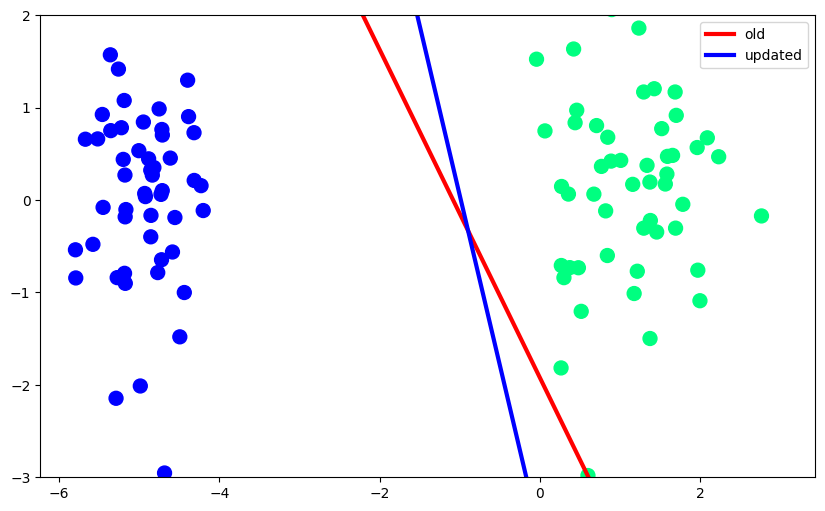

In [357]:
plt.figure(figsize=(10,6))

plt.plot(x_input1,y_input1,color='red',linewidth=3,label='old')
plt.plot(x_input2,y_input2,color='blue',linewidth=3,label='updated')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)

In [358]:
from sklearn.linear_model import LogisticRegression

In [359]:
lr = LogisticRegression()

In [360]:
lr.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [361]:
lr.coef_[0][0]

np.float64(1.7725510128723736)

In [362]:
lr.intercept_

array([3.54700273])

In [363]:
# ax + by + c

# y = mx+c

# -by = ax  +c
# y = -(a/b)x  - c/b

In [364]:
m =  lr.coef_[0][0] / lr.coef_[0][1]
c = lr.intercept_/lr.coef_[0][1]

In [365]:
m

np.float64(148.89041745447042)

In [366]:
c

array([297.9404898])

In [367]:
x_input = np.linspace(-3,3,10)
y_input = m*x_input + c

In [368]:
y.shape

(100,)

(-3.0, 2.0)

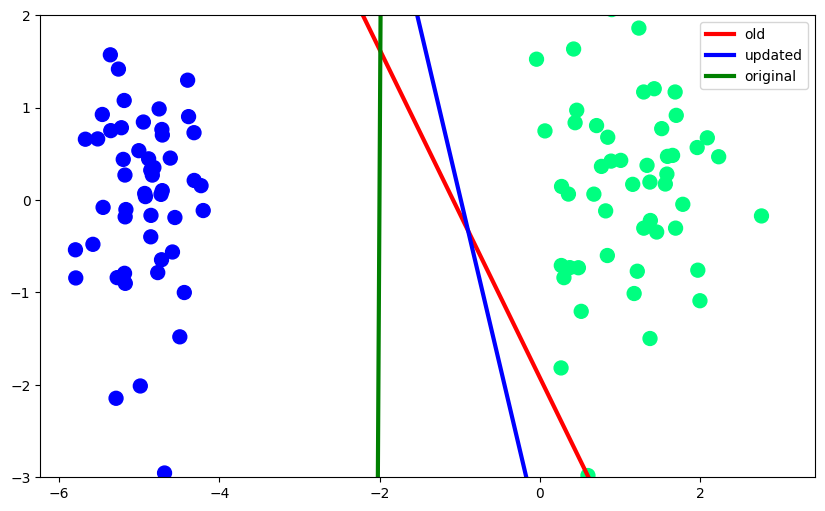

In [369]:
plt.figure(figsize=(10,6))

plt.plot(x_input1,y_input1,color='red',linewidth=3,label='old')
plt.plot(x_input2,y_input2,color='blue',linewidth=3,label='updated')
plt.plot(x_input,y_input,color='green',linewidth=3,label='original')


plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)